In [ ]:
# https://www.kaggle.com/startupsci/titanic-data-science-solutions

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

from tflearn.datasets import titanic

datasetName = 'titanic_dataset.csv'

if os.path.isfile('./' + datasetName):
    print("Titanic dataset... already exists")
else:
    titanic.download_dataset(datasetName)

import pandas as pd
df = pd.read_csv('titanic_dataset.csv', header='infer')

curses is not supported on this machine (please install/reinstall curses for an optimal experience)
Succesfully downloaded titanic_dataset.csv 82865 bytes.


In [90]:
df[['sex', 'survived']].groupby(['sex'], as_index=False).mean().sort_values(by='survived', ascending=False)

,sex,survived
0,female,0.727468
1,male,0.190985


In [97]:
df[['sex', 'survived']].groupby(['sex'], as_index=False)[['survived']].sum().sort_values(by='survived', ascending=False)

,sex,survived
0,female,339
1,male,161


In [123]:

df.groupby(['pclass','sex','survived']).agg({    'age': ["max", "median"],
                                                'name': ["first", "nunique"]})   

name  \
                                                                 first   
pclass sex    survived                                                   
1      female 0                           Allison, Miss. Helen Loraine   
              1                          Allen, Miss. Elisabeth Walton   
       male   0                   Allison, Mr. Hudson Joshua Creighton   
              1                         Allison, Master. Hudson Trevor   
2      female 0          Carter, Mrs. Ernest Courtenay (Lilian Hughes)   
              1                  Abelson, Mrs. Samuel (Hannah Wizosky)   
       male   0                                    Abelson, Mr. Samuel   
              1                                      Beane, Mr. Edward   
3      female 0         Ahlin, Mrs. Johan (Johanna Persdotter Larsson)   
              1                       Abbott, Mrs. Stanton (Rosa Hunt)   
       male   0                                    Abbing, Mr. Anthony   
              1                          Abelseth, Mr. Olaus Jorgensen   

                                 age         
                       nunique   max median  
pclass sex    survived                       
1      female 0              5  63.0  36.00  
              1            139  76.0  35.00  
       male   0            118  71.0  40.00  
              1             61  80.0  35.00  
2      female 0             12  60.0  28.00  
              1             94  55.0  27.00  
       male   0            146  70.0  29.50  
              1             25  62.0   8.00  
3      female 0            110  48.0  18.00  
              1            106  63.0  15.50  
       male   0            417  74.0  20.25  
              1             75  45.0  21.00

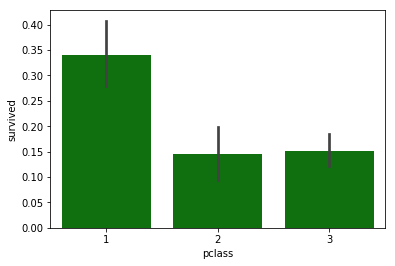

In [54]:
male_df = df[df.sex == 'male']

sns.barplot('pclass', 'survived', data=male_df, color="green")
plt.show()

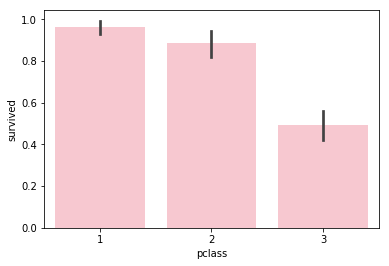

In [50]:
female_df = df[df.sex == 'female']

sns.barplot('pclass', 'survived', data=female_df, color="pink")
plt.show()

In [8]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()

In [82]:
clf = clf.fit(df[["survived"]], df[["sex"]])

In [83]:
predict_who_will_die = clf.predict([[0]]) # 0 = die

In [84]:
predict_who_will_survive = clf.predict([[1]]) # 1 = survive

In [85]:
print("most likely, people in this type will die:",predict_who_will_die)


most likely, people in this type will die: ['male']


In [86]:
print("most likely, people in this type will survive:",predict_who_will_survive)

most likely, people in this type will survive: ['female']
